# Challenge - Coin Detection

## Problem approach

In [4]:
import cv2
from matplotlib import pyplot as plt

In [102]:
# Let's load the first image
image = cv2.imread("./coin-dataset/0c32061c-a21b-46e5-8b6b-b483b1829271_jpg.rf.cc038429f89871ce7b34b6ac3eb3e983.jpg");

In [103]:
# Convert the image from BGR color (which OpenCV uses) to RGB color (which matplotlib expects)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

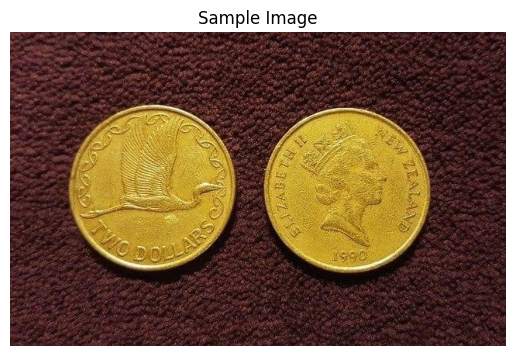

In [104]:
# Use matplotlib to display the image
plt.imshow(image_rgb)
plt.title("Sample Image")
plt.axis("off")  # Turn off axis numbering
plt.show()

In [105]:
# Convert image to gray scale from BGR
grayed_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

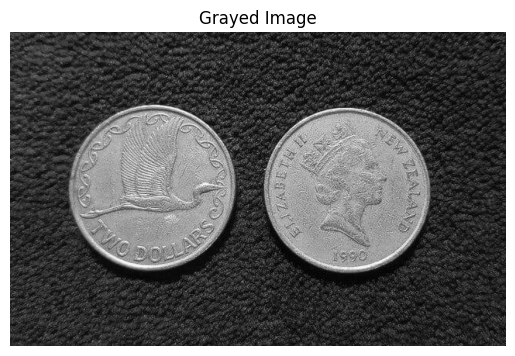

In [106]:
plt.imshow(grayed_image, cmap='gray')
plt.title("Grayed Image")
plt.axis("off")  # Turn off axis numbering
plt.show()

### Why Grayscale?

Converting an image to grayscale is a common preprocessing step in image processing and computer vision tasks for several reasons:

1. **Simplification**: Grayscale images reduce complexity by having only one channel of data, speeding up processing.
2. **Focus on Structure and Texture**: Grayscale removes color distractions, allowing algorithms to focus on structural details and textures.
3. **Algorithm Requirements**: Many computer vision algorithms are designed to operate on grayscale images for ease and efficiency.
4. **Lighting Conditions**: Grayscale conversion minimizes the impact of variable lighting and enhances consistency across images.
5. **Resource Efficiency**: Processing grayscale images consumes less memory and computing power, which is advantageous for resource-limited environments.
6. **Preparation for Further Processing**: Grayscale is often used in machine learning to simplify data input and reduce computational demands, particularly in tasks like facial recognition.

Overall, converting to grayscale is often a crucial step to increase the efficiency and effectiveness of various image processing and analysis tasks.

In [107]:
# To detect the coins, we need to blur it
blurred_image = cv2.GaussianBlur(grayed_image, (11, 11), 0)

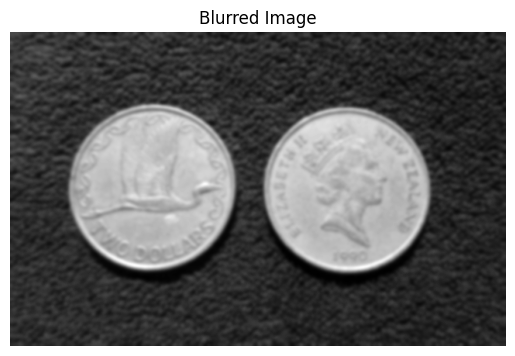

In [108]:
plt.imshow(blurred_image, cmap='gray')
plt.title("Blurred Image")
plt.axis("off")  # Turn off axis numbering
plt.show()

## Why blur?

The Purpose of applying Gaussian blur in the context of coin detection:

1. **Noise Reduction**: Reduces random variations in pixel intensity, which can obscure important features.
   
2. **Smooth Edges**: Makes the edges of coins smoother, aiding in more effective edge detection.

3. **Filter Out High-Frequency Information**: Removes small details and fluctuations that are not essential for detecting larger, smoother objects like coins.

4. **Improve Edge Detection**: Ensures that edge detection algorithms can find more consistent and continuous edges, which are crucial for accurately outlining coins.

5. **Prepare for Further Processing**: Creates a cleaner image that is better suited for techniques like the Hough Circle Transform used in detecting circular objects like coins.

## Edge detection

Let's use the Canny Edge detection

Adjust Threshold Values: The two threshold values in the Canny edge detector function, threshold1 and threshold2, are key to determining what is recognized as an edge. 

- The first threshold is used for initial edge detection.
- The second threshold is used to decide which edges are really edges (connecting edges).

In [109]:
canny_image = cv2.Canny(blurred_image, 50, 200)

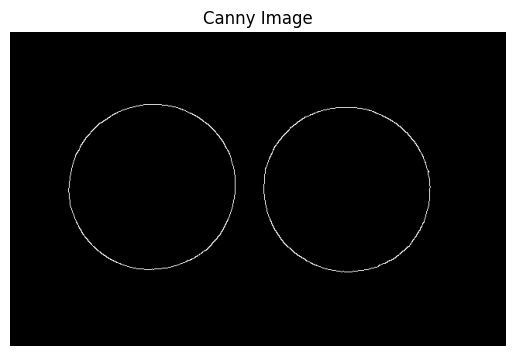

In [110]:
plt.imshow(canny_image, cmap='gray')
plt.title("Canny Image")
plt.axis("off")  # Turn off axis numbering
plt.show()

## Let's find each coin by it's contour

In [111]:
# Find contours from the Canny image
contours, hierarchy = cv2.findContours(canny_image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
cv2.drawContours(image, contours, -1, (0, 255, 0), 2)

# Convert the image with contours from BGR to RGB (since OpenCV uses BGR and matplotlib expects RGB)
image_rgb_with_contours = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

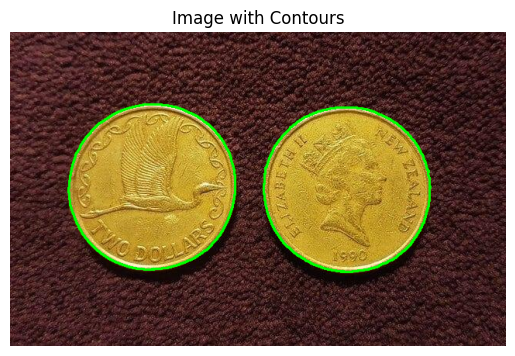

In [112]:
# Use matplotlib to display the image with contours
plt.imshow(image_rgb_with_contours)
plt.title("Image with Contours")
plt.axis("off")  # Turn off axis numbering
plt.show()